In [1]:
import pandas as pd
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [2]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [3]:
'''For recommendation system we can select column such as type and genre (listend_in ).
We can use these columns to create a new column that is the combination of both type and genre. This approach is called feature concatenation.
''' 
df['combined_features'] = df['listed_in'] + ', ' + df['type']
print(df[['title', 'combined_features']].head())

                   title                                  combined_features
0   Dick Johnson Is Dead                               Documentaries, Movie
1          Blood & Water  International TV Shows, TV Dramas, TV Mysterie...
2              Ganglands  Crime TV Shows, International TV Shows, TV Act...
3  Jailbirds New Orleans                    Docuseries, Reality TV, TV Show
4           Kota Factory  International TV Shows, Romantic TV Shows, TV ...


In [4]:
#using count vectorizer to convert the combined feature into vectorized form.
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
genre_matrix = vectorizer.fit_transform(df['combined_features'])

C:\Arun\anaconda3\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [5]:
vectorizer.vocabulary_

{'documentaries': 10,
 'movie': 21,
 'international tv shows': 17,
 'tv dramas': 37,
 'tv mysteries': 39,
 'tv show': 41,
 'crime tv shows': 8,
 'tv action & adventure': 35,
 'docuseries': 11,
 'reality tv': 24,
 'romantic tv shows': 26,
 'tv comedies': 36,
 'tv horror': 38,
 'children & family movies': 4,
 'dramas': 12,
 'independent movies': 15,
 'international movies': 16,
 'british tv shows': 3,
 'comedies': 7,
 'spanish-language tv shows': 29,
 'thrillers': 34,
 'romantic movies': 25,
 'music & musicals': 23,
 'horror movies': 14,
 'sci-fi & fantasy': 27,
 'tv thrillers': 43,
 "kids' tv": 18,
 'action & adventure': 0,
 'tv sci-fi & fantasy': 40,
 'classic movies': 6,
 'anime features': 1,
 'sports movies': 30,
 'anime series': 2,
 'korean tv shows': 19,
 'science & nature tv': 28,
 'teen tv shows': 33,
 'cult movies': 9,
 'tv shows': 42,
 'faith & spirituality': 13,
 'lgbtq movies': 20,
 'stand-up comedy': 31,
 'movies': 22,
 'stand-up comedy & talk shows': 32,
 'classic & cult tv

In [6]:
vectorizer.get_feature_names_out()

array(['action & adventure', 'anime features', 'anime series',
       'british tv shows', 'children & family movies',
       'classic & cult tv', 'classic movies', 'comedies',
       'crime tv shows', 'cult movies', 'documentaries', 'docuseries',
       'dramas', 'faith & spirituality', 'horror movies',
       'independent movies', 'international movies',
       'international tv shows', "kids' tv", 'korean tv shows',
       'lgbtq movies', 'movie', 'movies', 'music & musicals',
       'reality tv', 'romantic movies', 'romantic tv shows',
       'sci-fi & fantasy', 'science & nature tv',
       'spanish-language tv shows', 'sports movies', 'stand-up comedy',
       'stand-up comedy & talk shows', 'teen tv shows', 'thrillers',
       'tv action & adventure', 'tv comedies', 'tv dramas', 'tv horror',
       'tv mysteries', 'tv sci-fi & fantasy', 'tv show', 'tv shows',
       'tv thrillers'], dtype=object)

In [7]:
#The words: "Documentaries, Movie" is converted into the array shown below.
genre_matrix.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [8]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(genre_matrix, genre_matrix)
cosine_sim.shape


(8807, 8807)

In [9]:
'''Here cosime_sim is a 2d matrix. The index of dataframe has the same length as the cosine_sim 
i.e. 8807 and the columns have the same width as the cosine_sim matrix which is also 8807. '''
cosine_sim_column = pd.DataFrame(cosine_sim, index=df['title'], columns=df['title'])
print(cosine_sim_column.head())

title                  Dick Johnson Is Dead  Blood & Water  Ganglands  \
title                                                                   
Dick Johnson Is Dead                    1.0       0.000000   0.000000   
Blood & Water                           0.0       1.000000   0.500000   
Ganglands                               0.0       0.500000   1.000000   
Jailbirds New Orleans                   0.0       0.288675   0.288675   
Kota Factory                            0.0       0.500000   0.500000   

title                  Jailbirds New Orleans  Kota Factory  Midnight Mass  \
title                                                                       
Dick Johnson Is Dead                0.000000      0.000000       0.000000   
Blood & Water                       0.288675      0.500000       0.750000   
Ganglands                           0.288675      0.500000       0.250000   
Jailbirds New Orleans               1.000000      0.288675       0.288675   
Kota Factory              

In [10]:
'''The recommend_movies function recommends movies similar to a 
given movie based on cosine similarity scores between the movies. 
It returns the top 5 most similar movies.'''
def recommend_movies(movie_title, cosine_sim_column, df, top_n=5):
    try:
        idx = df.index[df['title'] == movie_title].tolist()[0]
        sim_scores = list(enumerate(cosine_sim_column.iloc[idx]))

        # Sort the movies based on the similarity scores
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

        # Get the scores of the top-n most similar movies
        sim_scores = sim_scores[1:top_n + 1]

        movie_indices = [i[0] for i in sim_scores]
        return df['title'].iloc[movie_indices]
    except IndexError:
        print("Movie not found!")
name = input('Enter the movie name: ')
recommended_movies = recommend_movies(name, cosine_sim_column, df)
print(f"Movies recommended for {name}:")
print(recommended_movies)


Enter the movie name:  Ganglands


Movies recommended for Ganglands:
11      Bangkok Breaking
543           Undercover
734                Lupin
1223              Dealer
2676               Fauda
Name: title, dtype: object


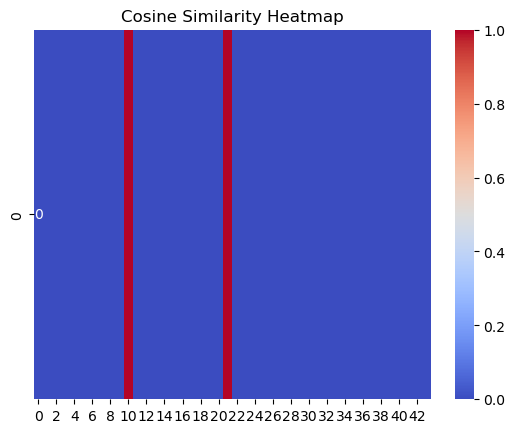

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(genre_matrix.toarray()[:1], annot=True, cmap='coolwarm')
plt.title('Cosine Similarity Heatmap')
plt.show()